In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib seaborn
!{sys.executable} -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import kagglehub
# This should now work!
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print("Path to dataset files:", path)

/Users/spartan/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/spartan/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [5]:
import pandas as pd
import os

# The 'path' variable is already defined from the cell above
train_csv_path = os.path.join(path, 'fashion-mnist_train.csv')
test_csv_path = os.path.join(path, 'fashion-mnist_test.csv')

# Load the training data into a pandas DataFrame
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Display the first 5 rows of the training data to confirm it loaded correctly
print("Successfully loaded the training data:")
print(train_data.head())

Successfully loaded the training data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pi

In [ ]:
# Import numpy for numerical operations
import numpy as np

# Separate features and labels for training and test sets
X_train = train_data.drop('label', axis=1).values  # Features for training
y_train = train_data['label'].values               # Labels for training
X_test = test_data.drop('label', axis=1).values    # Features for testing
y_test = test_data['label'].values                 # Labels for testing

# Normalize pixel values to the range [0, 1] for better model performance
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model_sklearn = MLPClassifier(hidden_layer_sizes=(128,), max_iter=35, random_state=66, verbose=True)
print("Training model with Scikit-learn...")
model_sklearn.fit(X_train_normalized, y_train)
predictions = model_sklearn.predict(X_test_normalized)
accuracy = accuracy_score(y_test, predictions)
print(f"\n✅ Scikit-learn Model Accuracy: {accuracy * 100:.2f}%")

Training model with Scikit-learn...
Iteration 1, loss = 0.59114078
Iteration 2, loss = 0.42368263
Iteration 3, loss = 0.38545168
Iteration 4, loss = 0.36124878
Iteration 5, loss = 0.33777867
Iteration 6, loss = 0.32269191
Iteration 7, loss = 0.31191405
Iteration 8, loss = 0.30233273
Iteration 9, loss = 0.28804419
Iteration 10, loss = 0.28070217
Iteration 11, loss = 0.27490167
Iteration 12, loss = 0.26551829
Iteration 13, loss = 0.25796569
Iteration 14, loss = 0.25226434
Iteration 15, loss = 0.24502039
Iteration 16, loss = 0.24107065
Iteration 17, loss = 0.23413855
Iteration 18, loss = 0.23108929
Iteration 19, loss = 0.22340073
Iteration 20, loss = 0.21724634
Iteration 21, loss = 0.21520334
Iteration 22, loss = 0.20877034
Iteration 23, loss = 0.20527078
Iteration 24, loss = 0.20129811
Iteration 25, loss = 0.19795271
Iteration 26, loss = 0.19430228
Iteration 27, loss = 0.18938804
Iteration 28, loss = 0.18613138
Iteration 29, loss = 0.18209261
Iteration 30, loss = 0.17965389
Iteration 31,

/Users/spartan/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


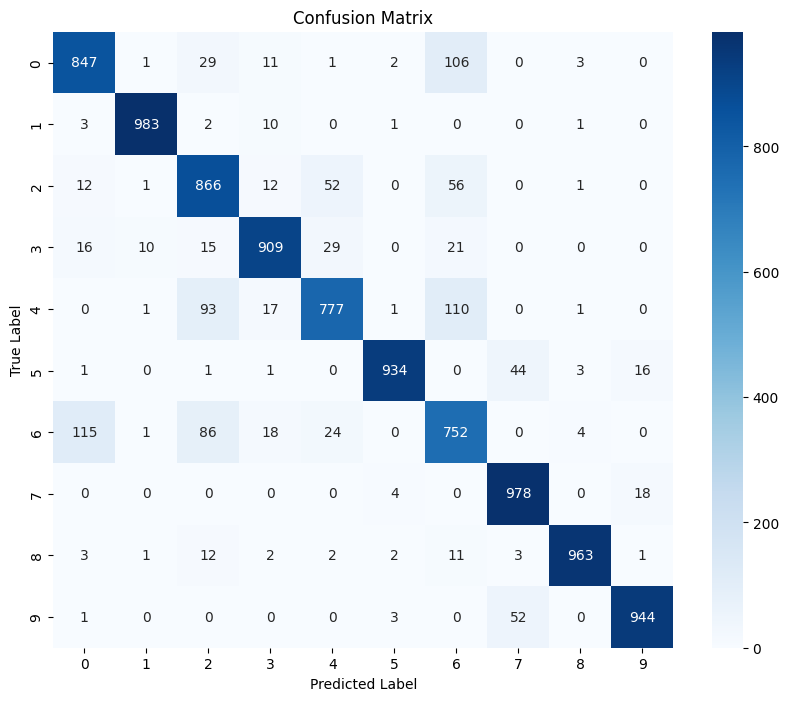

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

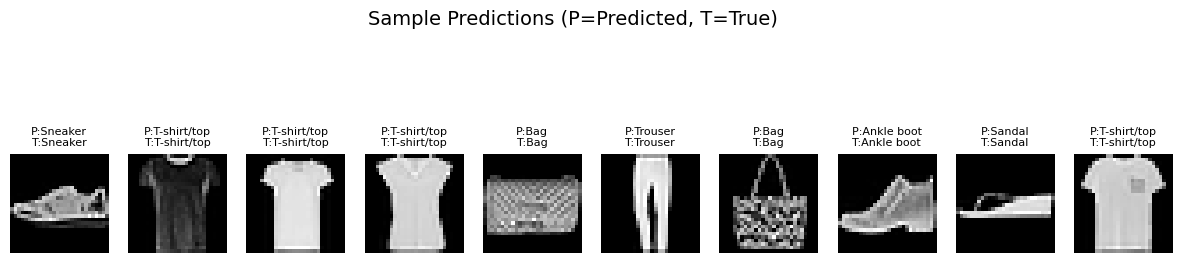

In [9]:
import numpy as np

# Fashion MNIST class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Show 10 random test images with predictions
plt.figure(figsize=(15,4))
for i, idx in enumerate(np.random.choice(len(X_test_normalized), 10, replace=False)):
    img = X_test_normalized[idx].reshape(28,28)
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"P:{class_names[predictions[idx]]}\nT:{class_names[y_test[idx]]}", fontsize=8)
plt.suptitle("Sample Predictions (P=Predicted, T=True)", fontsize=14)
plt.show()

In [10]:
import tensorflow as tf

# Reshape data for CNN: (samples, 28, 28, 1)
X_train_cnn = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_normalized.reshape(-1, 28, 28, 1)

# Build a simple CNN model
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nTraining CNN model with TensorFlow...")
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate on test data
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\n✅ CNN Model Accuracy: {accuracy * 100:.2f}%")


Training CNN model with TensorFlow...
Epoch 1/10


/Users/spartan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7049 - loss: 0.8464 - val_accuracy: 0.8312 - val_loss: 0.4613
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8550 - loss: 0.4011 - val_accuracy: 0.8745 - val_loss: 0.3594
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8817 - loss: 0.3368 - val_accuracy: 0.8730 - val_loss: 0.3577
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8917 - loss: 0.3036 - val_accuracy: 0.8922 - val_loss: 0.3060
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9028 - loss: 0.2700 - val_accuracy: 0.8968 - val_loss: 0.2891
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9077 - loss: 0.2558 - val_accuracy: 0.8952 - val_loss: 0.2902
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9155 - loss: 0.2347 - val_accuracy: 0.9047 - val_loss: 0.2711
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9193 - loss: 0.2229 - val_accuracy: 0.902

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train_cnn)

# Deeper CNN model
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

print("\nTraining improved CNN model with data augmentation and early stopping...")
history = model_cnn.fit(
    datagen.flow(X_train_cnn, y_train, batch_size=128),
    epochs=30,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop]
)

# Evaluate on test data
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\n✅ Improved CNN Model Accuracy: {accuracy * 100:.2f}%")


Training improved CNN model with data augmentation and early stopping...
Epoch 1/30


/Users/spartan/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.5997 - loss: 1.0826 - val_accuracy: 0.8081 - val_loss: 0.4713
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.7762 - loss: 0.5903 - val_accuracy: 0.8547 - val_loss: 0.3853
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.8066 - loss: 0.5175 - val_accuracy: 0.8721 - val_loss: 0.3362
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.8274 - loss: 0.4677 - val_accuracy: 0.8897 - val_loss: 0.2937
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 125ms/step - accuracy: 0.8398 - loss: 0.4337 - val_accuracy: 0.8935 - val_loss: 0.2804
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.8463 - loss: 0.4166 - val_accuracy: 0.9004 - val_loss: 0.2642
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.8573 - loss: 0.3965 - val_accuracy: 0.9024 - val_loss: 0.2626
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.8635 - loss: 0.3857 - val